In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import itertools

In [2]:
data = pd.read_csv('transformed_dataset.csv')
data.head(5)

,shopping_center_id,datetime_utc,device_hash,days,ping_time,weekdays,months,ping_hour
0,SC4,2019-09-14 19:26:11,048b7fa6d5,6,19:26:11,Saturday,9,19
1,SC2,2019-09-14 13:00:19,6a08be3bbd,6,13:00:19,Saturday,9,13
2,SC4,2019-09-14 13:47:39,92bf229b38,6,13:47:39,Saturday,9,13
3,SC3,2019-09-14 17:19:42,7d2760d7f2,6,17:19:42,Saturday,9,17
4,SC4,2019-09-14 18:13:19,96737a4da8,6,18:13:19,Saturday,9,18


In [3]:
data.device_hash.value_counts().mean()

14.352507891967731

In [4]:
data.shape

(81838, 8)

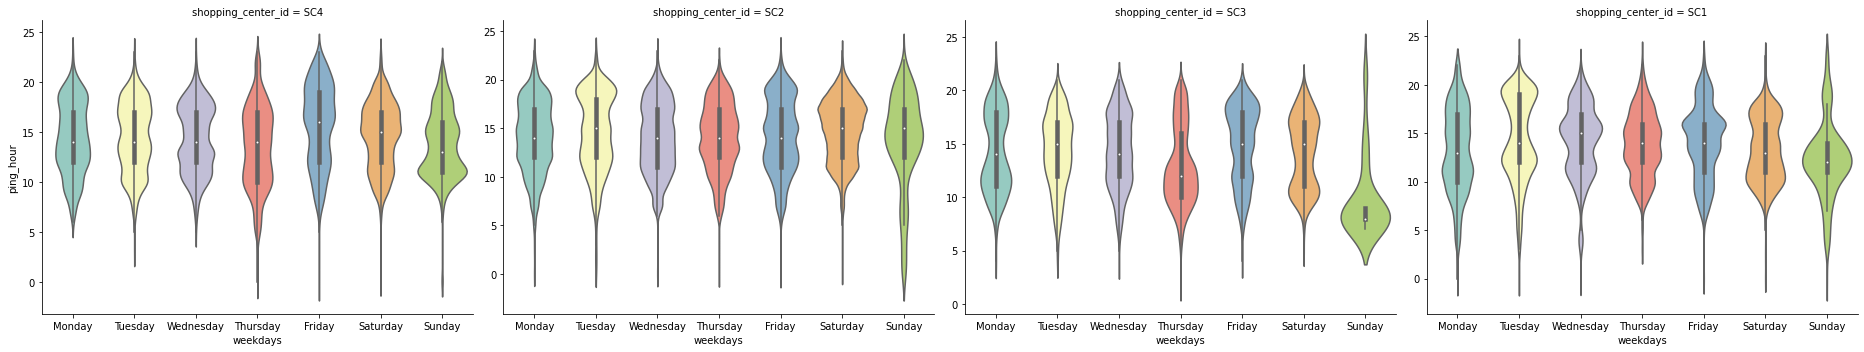

In [5]:
g = sns.catplot(
  x="weekdays",
  y="ping_hour",
  col="shopping_center_id",
  data=data,
  palette='Set3',
  kind="violin",
  split=True,
  height=5,
  order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
  sharey=False,
  aspect=1.3
);

In [6]:
device_count_table = pd.DataFrame(
  data.device_hash.value_counts()
)
device_count_table = device_count_table.reset_index()
device_count_table.columns=['device_hash','ping_count']

In [7]:
device_count_table

,device_hash,ping_count
0,c0d915dfc1,2292
1,d5a421ce63,1224
2,8145b84bf3,1091
3,96737a4da8,1062
4,06db43d251,720
...,...,...
5697,01be2e020c,1
5698,0a93007ee1,1
5699,1c15c2a21c,1
5700,f83d8b2a9b,1


In [8]:
device_count_table.describe()

,ping_count
count,5702.000000
mean,14.352508
std,54.092743
min,1.000000
25%,2.000000
50%,5.000000
75%,12.000000
max,2292.000000


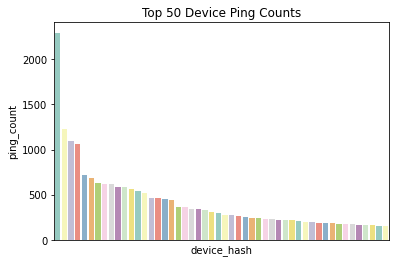

In [9]:
sns.barplot(
  x='device_hash',
  y='ping_count',
  data = device_count_table[:50],
  palette='Set3'
)
plt.xticks([]);
plt.title('Top 50 Device Ping Counts');

Let's look at the most common device hash for example

In [10]:
data.loc[data['device_hash']=='06db43d251']

,shopping_center_id,datetime_utc,device_hash,days,ping_time,weekdays,months,ping_hour
120,SC2,2019-09-13 08:06:44,06db43d251,5,08:06:44,Friday,9,8
383,SC2,2019-09-03 15:57:28,06db43d251,2,15:57:28,Tuesday,9,15
537,SC2,2019-09-13 14:01:00,06db43d251,5,14:01:00,Friday,9,14
770,SC2,2019-09-07 11:31:35,06db43d251,6,11:31:35,Saturday,9,11
782,SC2,2019-09-13 13:53:55,06db43d251,5,13:53:55,Friday,9,13
...,...,...,...,...,...,...,...,...
81469,SC2,2019-09-04 09:39:32,06db43d251,3,09:39:32,Wednesday,9,9
81470,SC2,2019-09-04 13:50:13,06db43d251,3,13:50:13,Wednesday,9,13
81522,SC2,2019-09-11 15:52:56,06db43d251,3,15:52:56,Wednesday,9,15
81610,SC2,2019-09-04 11:46:27,06db43d251,3,11:46:27,Wednesday,9,11


In [11]:
sample_sc1 = data[data['shopping_center_id']=='SC1']
sample_sc2 = data[data['shopping_center_id']=='SC2']
sample_sc3 = data[data['shopping_center_id']=='SC3']
sample_sc4 = data[data['shopping_center_id']=='SC4']

In [12]:
sc_1_device_count_table = pd.DataFrame(
  sample_sc1.device_hash.value_counts()
)
sc_1_device_count_table = sc_1_device_count_table.reset_index()
sc_1_device_count_table.columns=['device_hash','ping_count']

sc_2_device_count_table = pd.DataFrame(
  sample_sc2.device_hash.value_counts()
)
sc_2_device_count_table = sc_2_device_count_table.reset_index()
sc_2_device_count_table.columns=['device_hash','ping_count']

sc_3_device_count_table = pd.DataFrame(
  sample_sc3.device_hash.value_counts()
)
sc_3_device_count_table = sc_3_device_count_table.reset_index()
sc_3_device_count_table.columns=['device_hash','ping_count']

sc_4_device_count_table = pd.DataFrame(
  sample_sc4.device_hash.value_counts()
)
sc_4_device_count_table = sc_4_device_count_table.reset_index()
sc_4_device_count_table.columns=['device_hash','ping_count']

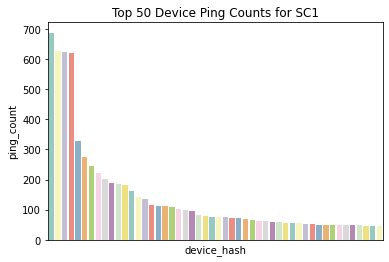

In [13]:
sns.barplot(
  x='device_hash',
  y='ping_count',
  data = sc_1_device_count_table[:50],
  palette='Set3'
)

plt.xticks([]);
plt.title('Top 50 Device Ping Counts for SC1');

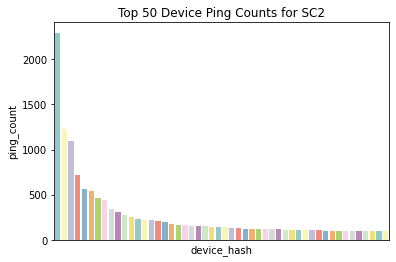

In [14]:
sns.barplot(
  x='device_hash',
  y='ping_count',
  data = sc_2_device_count_table[:50],
  palette='Set3'
)

plt.xticks([]);
plt.title('Top 50 Device Ping Counts for SC2');

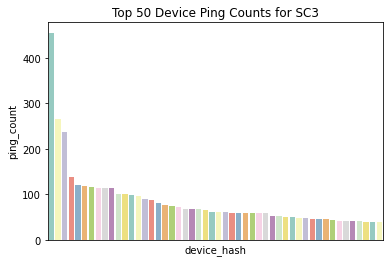

In [15]:
sns.barplot(
  x='device_hash',
  y='ping_count',
  data = sc_3_device_count_table[:50],
  palette='Set3'
)

plt.xticks([]);
plt.title('Top 50 Device Ping Counts for SC3');

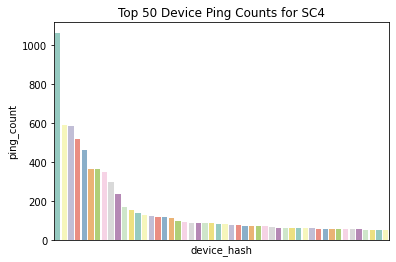

In [16]:
sns.barplot(
  x='device_hash',
  y='ping_count',
  data = sc_4_device_count_table[:50],
  palette='Set3'
)

plt.xticks([]);
plt.title('Top 50 Device Ping Counts for SC4');

In [17]:
#SC 4 is probably a big shopping center
#SC 1 / 3 / 2  are closed on Sunday or partially closed
#Each of the shopping centers have their own extreme values, therefore we think it is a good idea to remove the top 5 from each shopping center, because we dont know
#it is devices 

In [18]:
remove_list = [
  sc_1_device_count_table['device_hash'][:10],
  sc_2_device_count_table['device_hash'][:10],
  sc_3_device_count_table['device_hash'][:10],
  sc_4_device_count_table['device_hash'][:10],
]

In [19]:
remove_list = list(itertools.chain(*remove_list))

In [20]:
clean_data = data[~data['device_hash'].isin(remove_list)]
clean_data.reset_index(drop=True,inplace=True)

In [21]:
clean_data

,shopping_center_id,datetime_utc,device_hash,days,ping_time,weekdays,months,ping_hour
0,SC4,2019-09-14 19:26:11,048b7fa6d5,6,19:26:11,Saturday,9,19
1,SC2,2019-09-14 13:00:19,6a08be3bbd,6,13:00:19,Saturday,9,13
2,SC4,2019-09-14 13:47:39,92bf229b38,6,13:47:39,Saturday,9,13
3,SC3,2019-09-14 17:19:42,7d2760d7f2,6,17:19:42,Saturday,9,17
4,SC3,2019-09-17 10:56:04,98b92252d3,2,10:56:04,Tuesday,9,10
...,...,...,...,...,...,...,...,...
63211,SC2,2019-09-11 13:53:46,a1cbe92a6f,3,13:53:46,Wednesday,9,13
63212,SC2,2019-09-11 10:50:04,e8a32ef1d9,3,10:50:04,Wednesday,9,10
63213,SC1,2019-09-14 17:14:49,c13cc52e82,6,17:14:49,Saturday,9,17
63214,SC2,2019-09-04 14:12:18,dbdee4cd27,3,14:12:18,Wednesday,9,14


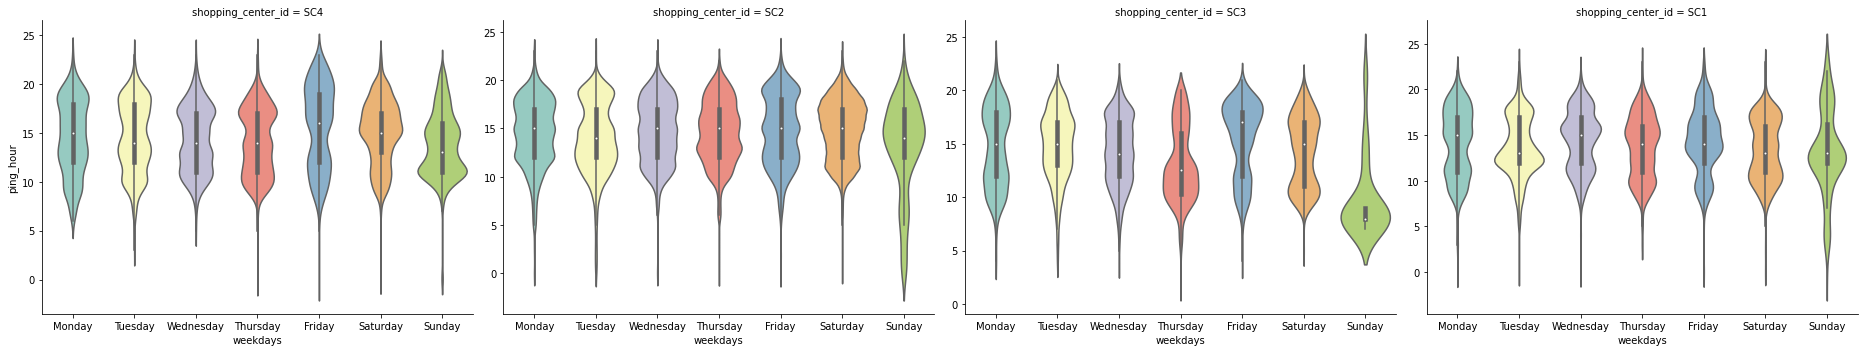

In [22]:
g = sns.catplot(
  x="weekdays",
  y="ping_hour",
  col="shopping_center_id",
  data=clean_data,
  palette='Set3',
  kind="violin",
  split=True,
  height=5,
  order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
  sharey=False,
  aspect=1.3
);

In [23]:
clean_data.describe()

,days,months,ping_hour
count,63216.000000,63216.0,63216.000000
mean,3.708270,9.0,14.420890
std,1.925422,0.0,3.491508
min,1.000000,9.0,0.000000
25%,2.000000,9.0,12.000000
50%,4.000000,9.0,15.000000
75%,6.000000,9.0,17.000000
max,7.000000,9.0,23.000000


In [24]:
clean_device_count_table = pd.DataFrame(
  clean_data.device_hash.value_counts()
)
clean_device_count_table = clean_device_count_table.reset_index()
clean_device_count_table.columns=['device_hash','ping_count']

In [25]:
clean_device_count_table

,device_hash,ping_count
0,2023837041,276
1,1696baed4b,255
2,dbdee4cd27,227
3,7213b8d9dd,224
4,d9ec67e526,217
...,...,...
5657,01be2e020c,1
5658,0a93007ee1,1
5659,1c15c2a21c,1
5660,f83d8b2a9b,1


In [26]:
agg_df = clean_data.groupby([
  'shopping_center_id',
  'weekdays',
], as_index=False).agg({
  'ping_time': 'count',
  'device_hash':pd.Series.nunique,
  'ping_hour':[lambda x:x.quantile(0.05),lambda x:x.quantile(0.95)]
})
agg_df

shopping_center_id   weekdays ping_time device_hash  ping_hour           
                                     count     nunique <lambda_0> <lambda_1>
0                 SC1     Friday      1780         224       8.95      20.00
1                 SC1     Monday      2098         264       8.00      19.15
2                 SC1   Saturday      2360         313       8.00      18.00
3                 SC1     Sunday       244          54       4.00      21.00
4                 SC1   Thursday      1548         196       8.00      19.00
5                 SC1    Tuesday      1836         258       8.00      19.00
6                 SC1  Wednesday      1197         176       9.00      19.00
7                 SC2     Friday      4449         486       9.00      20.00
8                 SC2     Monday      5598         588       9.00      19.00
9                 SC2   Saturday      7832         725      10.00      19.00
10                SC2     Sunday       496         115       2.75      19.00
11                SC2   Thursday      3455         410      10.00      20.00
12                SC2    Tuesday      5751         547       8.00      19.00
13                SC2  Wednesday      4246         468      10.00      19.75
14                SC3     Friday      1646         210       9.00      20.00
15                SC3     Monday      1787         268       9.00      20.00
16                SC3   Saturday      2075         263       9.00      19.00
17                SC3     Sunday        55          23       7.00      18.20
18                SC3   Thursday      1282         163       9.00      19.00
19                SC3    Tuesday      1511         224       9.00      19.00
20                SC3  Wednesday      1143         189       9.00      19.00
21                SC4     Friday       980         181       9.00      22.00
22                SC4     Monday      1506         167       8.00      20.00
23                SC4   Saturday      1968         294       9.00      20.00
24                SC4     Sunday      1700         316      10.00      20.00
25                SC4   Thursday      1221         164       9.00      19.00
26                SC4    Tuesday      2051         272       9.00      20.00
27                SC4  Wednesday      1401         198      10.00      19.00

In [27]:
agg_df.columns = ['shopping_center_id','weekdays','ping_time','device_count','ping_hour_5%','ping_hour_95%']

In [28]:
agg_df['ping_hour_5%'] = agg_df['ping_hour_5%'].astype('int')
agg_df['ping_hour_95%'] = agg_df['ping_hour_95%'].astype('int')

In [29]:
agg_df

,shopping_center_id,weekdays,ping_time,device_count,ping_hour_5%,ping_hour_95%
0,SC1,Friday,1780,224,8,20
1,SC1,Monday,2098,264,8,19
2,SC1,Saturday,2360,313,8,18
3,SC1,Sunday,244,54,4,21
4,SC1,Thursday,1548,196,8,19
5,SC1,Tuesday,1836,258,8,19
6,SC1,Wednesday,1197,176,9,19
7,SC2,Friday,4449,486,9,20
8,SC2,Monday,5598,588,9,19
9,SC2,Saturday,7832,725,10,19


In [30]:
agg_df['target_opening'] = agg_df['ping_hour_5%'].astype('str')+' to '+agg_df['ping_hour_95%'].astype('str')

In [31]:
agg_df

,shopping_center_id,weekdays,ping_time,device_count,ping_hour_5%,ping_hour_95%,target_opening
0,SC1,Friday,1780,224,8,20,8 to 20
1,SC1,Monday,2098,264,8,19,8 to 19
2,SC1,Saturday,2360,313,8,18,8 to 18
3,SC1,Sunday,244,54,4,21,4 to 21
4,SC1,Thursday,1548,196,8,19,8 to 19
5,SC1,Tuesday,1836,258,8,19,8 to 19
6,SC1,Wednesday,1197,176,9,19,9 to 19
7,SC2,Friday,4449,486,9,20,9 to 20
8,SC2,Monday,5598,588,9,19,9 to 19
9,SC2,Saturday,7832,725,10,19,10 to 19


In [32]:
agg_df['target_opening'].value_counts()

9 to 19     7
9 to 20     5
8 to 19     4
10 to 19    3
8 to 20     2
10 to 20    2
8 to 18     1
4 to 21     1
2 to 19     1
7 to 18     1
9 to 22     1
Name: target_opening, dtype: int64

In [33]:
agg_df['target_opening'].replace('4 to 21','Closed',inplace=True)
agg_df['target_opening'].replace('2 to 19','Closed',inplace=True)
agg_df['target_opening'].replace('7 to 18','Closed',inplace=True)

In [34]:
agg_df

,shopping_center_id,weekdays,ping_time,device_count,ping_hour_5%,ping_hour_95%,target_opening
0,SC1,Friday,1780,224,8,20,8 to 20
1,SC1,Monday,2098,264,8,19,8 to 19
2,SC1,Saturday,2360,313,8,18,8 to 18
3,SC1,Sunday,244,54,4,21,Closed
4,SC1,Thursday,1548,196,8,19,8 to 19
5,SC1,Tuesday,1836,258,8,19,8 to 19
6,SC1,Wednesday,1197,176,9,19,9 to 19
7,SC2,Friday,4449,486,9,20,9 to 20
8,SC2,Monday,5598,588,9,19,9 to 19
9,SC2,Saturday,7832,725,10,19,10 to 19


In [35]:
agg_df['target_opening'].value_counts()

9 to 19     7
9 to 20     5
8 to 19     4
Closed      3
10 to 19    3
8 to 20     2
10 to 20    2
8 to 18     1
9 to 22     1
Name: target_opening, dtype: int64

In [36]:
agg_df['open_sunday'] = agg_df['target_opening'].apply(lambda x: 0 if x == 'Closed' else 1)

In [37]:
agg_df

,shopping_center_id,weekdays,ping_time,device_count,ping_hour_5%,ping_hour_95%,target_opening,open_sunday
0,SC1,Friday,1780,224,8,20,8 to 20,1
1,SC1,Monday,2098,264,8,19,8 to 19,1
2,SC1,Saturday,2360,313,8,18,8 to 18,1
3,SC1,Sunday,244,54,4,21,Closed,0
4,SC1,Thursday,1548,196,8,19,8 to 19,1
5,SC1,Tuesday,1836,258,8,19,8 to 19,1
6,SC1,Wednesday,1197,176,9,19,9 to 19,1
7,SC2,Friday,4449,486,9,20,9 to 20,1
8,SC2,Monday,5598,588,9,19,9 to 19,1
9,SC2,Saturday,7832,725,10,19,10 to 19,1


<h3> Machine Learning

Given the limited number of observations, we will just limit our analysis preparing a draft of machine learning analysis. 
As any result won't be meaningful with the dataset size.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [39]:
y = agg_df['target_opening']
X = agg_df.drop(['target_opening','shopping_center_id'],1)

/var/folders/nn/wzvvf1mn3gxbzwjhq00svfrr0000gn/T/ipykernel_12248/2968096309.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = agg_df.drop(['target_opening','shopping_center_id'],1)


In [40]:
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [41]:
categorical_features = [
  'weekdays',
]

categorical_transformer = Pipeline([
  ('binarizer',OneHotEncoder(sparse=False))
])

In [42]:
numerical_features = [
  'ping_time',
  'device_hash',
  'open_sunday'
]

numerical_transformer = Pipeline([
  ('scaler',StandardScaler())
])

In [43]:
transformers = [
    ('categorical',categorical_transformer,categorical_features),
    ('numerical',numerical_transformer,numerical_features),
]

preprocessing_pipe = ColumnTransformer(
  transformers=transformers
)

In [44]:
classifier_pipe_rfr = Pipeline(steps=[
  ('preprocessing',preprocessing_pipe),
  ('classifier_rfr', RandomForestClassifier(
    n_estimators=500,
    class_weight='balanced',
    n_jobs=-1,
  ))
])

classifier_pipe_logit = Pipeline(steps=[
  ('preprocessing',preprocessing_pipe),
  ('classifier_logit', LogisticRegression(
    class_weight='balanced',
    n_jobs=-1,
    multi_class='ovr',
    penalty='l2',
    solver='lbfgs'
  ))
])